# 📈 Q-Q Plot (Quantile-Quantile Plot)

A **Q-Q Plot** is a scatterplot created by plotting two sets of quantiles against each other. In Data Science, we typically plot the **theoretical quantiles** of a Normal distribution on the x-axis and the **actual quantiles** of our data on the y-axis.

---

### 1. How to Read a Q-Q Plot
The goal of a Q-Q plot is to determine if the data points follow the **"45-degree reference line."**

* **Normal Distribution:** If the data is Gaussian, the points will fall almost exactly on the straight diagonal line.
* **Non-Normal Distribution:** If the data is skewed or has heavy tails (high kurtosis), the points will "curve" or "snake" away from the line at the ends.



---

### 2. Identifying Distribution Shapes via Q-Q Plots

| Observation | Interpretation |
| :--- | :--- |
| **Points curve Up at both ends** | The distribution is **Right-Skewed** (Positive Skew). |
| **Points curve Down at both ends** | The distribution is **Left-Skewed** (Negative Skew). |
| **Both ends curve away from the line (S-shape)** | The distribution has **Heavy Tails** (High Kurtosis/Leptokurtic). |
| **Both ends curve toward the line** | The distribution has **Light Tails** (Low Kurtosis/Platykurtic). |



---

### 3. Why use a Q-Q Plot instead of a Histogram?
While histograms are great, they can be misleading based on the number of "bins" you choose. 
* A Q-Q plot is **more sensitive** to what is happening in the **tails** of the distribution.
* It allows you to see exactly where your data deviates from normality (e.g., "It's normal in the middle, but the outliers are too extreme").

---

### 4. Python Implementation
Using `scipy.stats` and `matplotlib`, you can generate a Q-Q plot with just a few lines of code.


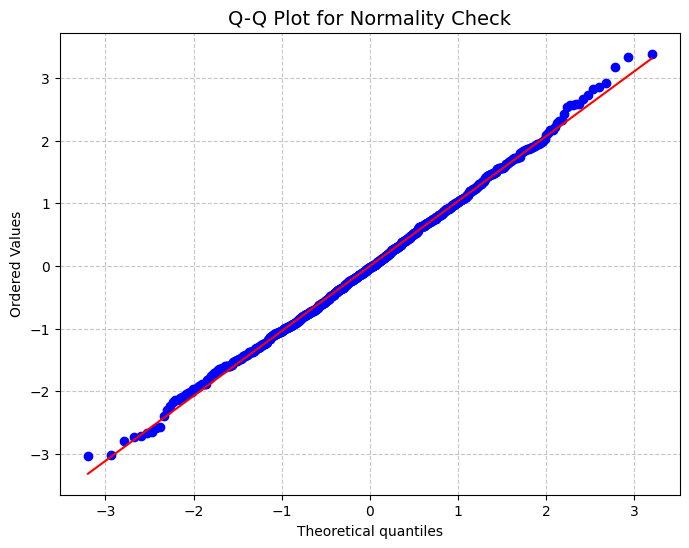

In [1]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Generate some random data
# Change this to np.random.exponential(size=1000) to see a non-normal plot!
data = np.random.normal(loc=0, scale=1, size=1000)

# 2. Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)

# 3. Formatting
plt.title('Q-Q Plot for Normality Check', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

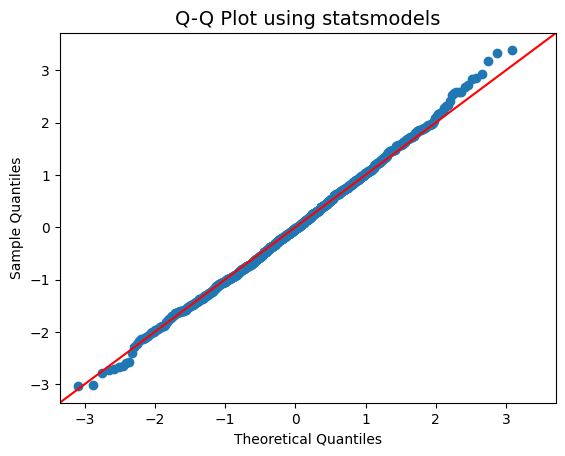

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(data, line ='45')
plt.title('Q-Q Plot using statsmodels', fontsize=14)
plt.show()

CAMPUX-[https://drive.google.com/file/d/1sd4nz8PNsGc334ng86V8uKvJNqhWyRZ2/view]

# Does QQ plot only detect normal distribution?

# 📉 Q-Q Plots: Not Just for Normality!

A common misconception is that Q-Q plots are only for checking Gaussian behavior. In reality, a Q-Q Plot compares **Quantiles vs. Quantiles**. If you have a theoretical distribution in mind, you can test your data against it.

---

### 1. Testing Against Other Distributions
In Python's `scipy.stats.probplot`, you can change the `dist` parameter to any distribution available in the library.

* **Exponential Distribution:** Used for modeling "time between events."
* **Uniform Distribution:** Used when every value has an equal chance.
* **Log-Normal Distribution:** Used for income or wealth data.
* **T-Distribution:** Used when you have heavy tails but want to see if they fit a specific "degree of freedom."

---

### 2. Comparing Two Real Datasets (Empirical Q-Q Plot)
You can also use a Q-Q plot to compare **two different samples** to see if they come from the same (unnamed) distribution.
* **Use Case:** Comparing the distribution of "Purchases" in Group A vs. Group B of an A/B test.
* **Logic:** If the points form a straight line, both groups follow the same distribution, even if that distribution is not "Normal."



---

### 3. Reading "Non-Normal" Patterns
Even when you are testing for normality, the Q-Q plot tells you **exactly how** the distribution is non-normal:

| Pattern on Q-Q Plot | Interpretation |
| :--- | :--- |
| **"S" Shape (Both ends curve away)** | **Heavy Tails** (Leptokurtic). The data has more outliers than a normal distribution. |
| **Inverse "S" (Both ends curve toward line)** | **Light Tails** (Platykurtic). The data is "capped" and has fewer outliers. |
| **Upward Curve (J-Shape)** | **Positive Skew**. The right tail is longer than the left. |
| **Downward Curve** | **Negative Skew**. The left tail is longer than the right. |



---

### 4. 🐍 Python: Testing for an Exponential Distribution
If your data looks like it follows an exponential decay, you would check it like this:



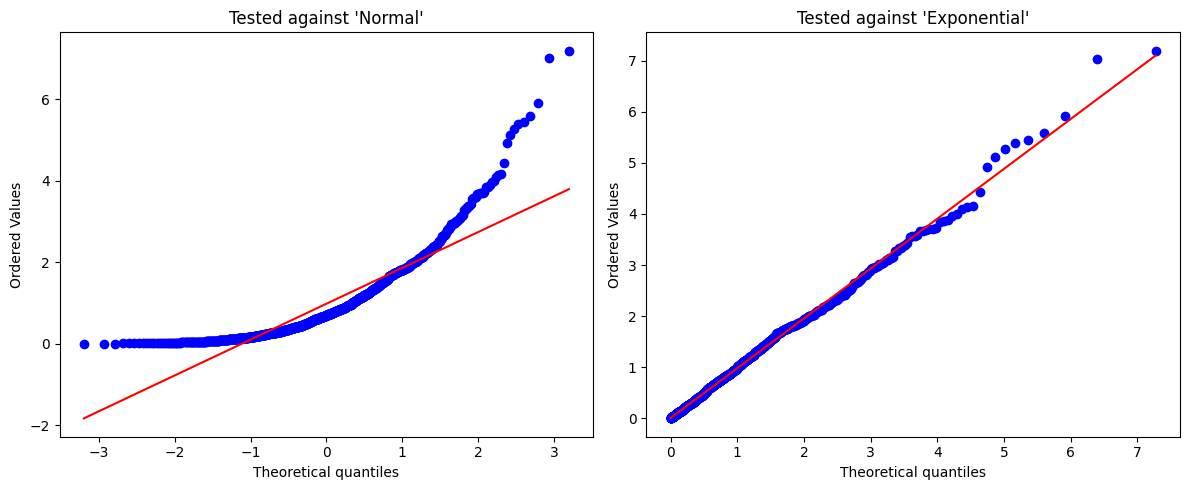

In [7]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate Exponential data (Non-Normal)
data = np.random.exponential(scale=1.0, size=1000)

plt.figure(figsize=(12, 5))

# Subplot 1: Testing against Normal (Will look curved/bad)
ax1 = plt.subplot(1, 2, 1)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Tested against 'Normal'")

# Subplot 2: Testing against Exponential (Will look straight/good)
ax2 = plt.subplot(1, 2, 2)
stats.probplot(data, dist="expon", plot=plt)
plt.title("Tested against 'Exponential'")

plt.tight_layout()
plt.show()